In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine


In [28]:
wine_df = load_wine(as_frame=True)

In [29]:
print(wine_df.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [30]:
X = wine_df.data
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [36]:
y = wine_df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [32]:
import seaborn as sns

wine_full_df = X.copy()
wine_full_df['target'] = y
sns.pairplot(wine_full_df, diag_kind="kde")

Error in callback <function flush_figures at 0x7f822de4a9d0> (for post_execute):


KeyboardInterrupt: 

In [37]:
y = y == 2
y.value_counts()

False    130
True      48
Name: target, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [39]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train, y_train)

In [40]:
from sklearn.linear_model import LogisticRegressionCV

logistic_regression = LogisticRegressionCV(Cs=np.logspace(-10, 10, 21), cv=20, penalty="l2", max_iter=10000)
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                     cv=20, max_iter=10000)

In [41]:
logistic_regression.C_

array([1.])

In [44]:
X_test_scaled = sc.transform(X_test)
y_test_pred = logistic_regression.predict(X_test_scaled)

In [48]:
from sklearn.metrics import roc_auc_score,roc_curve
roc_curve(y_test, y_test_pred)

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0]))

/Users/bachfischer/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


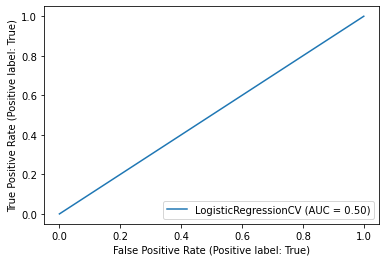

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
logistic_regression_disp = RocCurveDisplay.from_estimator(logistic_regression, X_test, y_test)
plt.show()